### import  basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from nolds import *
import statistics as st
from entropy import *


### read file

In [2]:
normal=[]
for i in glob('D:/Datasets/signal/fyp/before/*.csv'):
    file=pd.read_csv(i,usecols=[' IBI'],squeeze=True)[10:-10].dropna()
    file=file.loc[file.shift() != file].reset_index(drop=True).values
    normal.append(file)
    
stress=[]
for i in glob('D:/Datasets/signal/fyp/after/*.csv'):
    file=pd.read_csv(i,usecols=[' IBI'],squeeze=True)[10:-10].dropna() 
    file=file.loc[file.shift() != file].values #remove consective reduntdant value
    stress.append(file)
    

In [3]:
len(normal),len(stress)

(27, 27)

In [4]:
normal[0].shape,stress[0].shape

((469,), (532,))

In [5]:
normal_df=pd.DataFrame(normal)
stress_df=pd.DataFrame(stress)
y_normal=[0]*len(normal_df)
y_stress=[1]*len(stress_df)
y=pd.concat((pd.DataFrame(y_normal),pd.DataFrame(y_stress)),axis=0)
df=pd.concat((normal_df,stress_df),axis=0)
file=pd.concat((y,df),axis=1)    

#### print first five and last 5 rows of file

In [6]:
file.head()

,0,0,1,2,3,4,5,6,7,8,...,672,673,674,675,676,677,678,679,680,681
0,0,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,618.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,762.0,806.0,820.0,798.0,820.0,848.0,792.0,802.0,824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,286.0,544.0,326.0,548.0,892.0,862.0,806.0,840.0,864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,588.0,586.0,584.0,600.0,604.0,650.0,652.0,622.0,616.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,792.0,884.0,786.0,694.0,680.0,820.0,746.0,668.0,836.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### seprate data and labels. the first column correponds to label

In [7]:
data=file.iloc[:,1::]
labels=file.iloc[:,0]

#### print first five and last 5 rows of data and labels

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
0,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,618.0,648.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,762.0,806.0,820.0,798.0,820.0,848.0,792.0,802.0,824.0,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,286.0,544.0,326.0,548.0,892.0,862.0,806.0,840.0,864.0,868.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,588.0,586.0,584.0,600.0,604.0,650.0,652.0,622.0,616.0,628.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,792.0,884.0,786.0,694.0,680.0,820.0,746.0,668.0,836.0,934.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

### Remove missing values columns
remove columns having missing/NaN values. Hint use pandas dropna. check dropna attributes:
how,inplace,axis

In [10]:
data.dropna(how='any',inplace=True,axis=1)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,327,328,329,330,331,332,333,334,335,336
0,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,618.0,648.0,...,738.0,746.0,710.0,666.0,692.0,694.0,712.0,688.0,686.0,724.0
1,762.0,806.0,820.0,798.0,820.0,848.0,792.0,802.0,824.0,800.0,...,840.0,826.0,822.0,814.0,794.0,748.0,718.0,714.0,750.0,812.0
2,286.0,544.0,326.0,548.0,892.0,862.0,806.0,840.0,864.0,868.0,...,812.0,826.0,870.0,802.0,832.0,862.0,750.0,828.0,890.0,868.0
3,588.0,586.0,584.0,600.0,604.0,650.0,652.0,622.0,616.0,628.0,...,636.0,644.0,646.0,638.0,628.0,646.0,670.0,680.0,658.0,648.0
4,792.0,884.0,786.0,694.0,680.0,820.0,746.0,668.0,836.0,934.0,...,614.0,596.0,672.0,664.0,642.0,644.0,742.0,752.0,688.0,692.0


In [12]:
data.shape

(54, 337)

### Plot the data 


In [13]:
labels[26]

26    0
26    1
Name: 0, dtype: int64

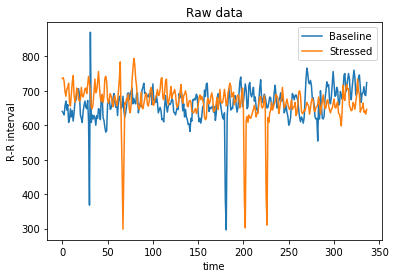

In [14]:
plt.plot(data.T.iloc[:,0:1],label='Baseline'); #PLOT 
plt.plot(data.T.iloc[:,27:28],label='Stressed');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Raw data')
plt.legend()

### Remove Outliers
remove outliers, such as value greater than 1000 and lower than 600. you can either do it using 
pandas or numpy . you can use a better strategy such as inter quartile range

In [15]:
median = data.median()
#data=data.values
data=np.where((data < median) | (data < median) , median, data)

In [16]:
#data=np.where((data.values > 1000) | (data.values<600), np.median(data.values), data.values)

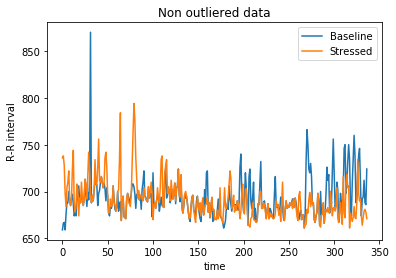

In [17]:
plt.plot(data.T[:,0:1],label='Baseline'); #PLOT 
plt.plot(data.T[:,27:28],label='Stressed');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Non outliered data')
plt.legend()

### Apply filter to the data
apply any smoothening filter such as Savitzky-Golay filter or moving average filter

In [18]:
data.shape

(54, 337)

In [19]:
from scipy.signal import savgol_filter
data=savgol_filter(data,5,3)

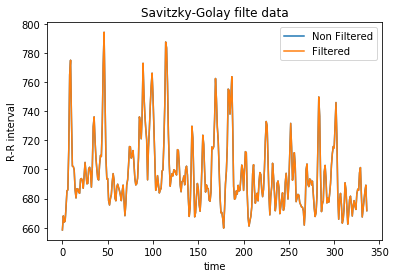

In [20]:
plt.plot(data.T[:,10:11],label='Non Filtered'); #PLOT 
plt.plot(data.T[:,10:11],label='Filtered');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Savitzky-Golay filte data')
plt.legend()

## calculate features

calculate following features.
* mean
* median
* maximum
* variance
* standard deviation
* maximum
* minimum
* and the following

In [21]:
def ranges(x):
    return x.max() - x.min()

def rmssd(x):
    return np.sqrt(np.mean(np.diff(x) ** 2))
def sdsd(x):
    return st.stdev(np.diff(x))
    
def nni_50(x):
    return  sum(np.abs(np.diff(x)) > 50)

def pnni_50(x):
    return 100 * nni_50(x) / len(x)

def nni_20(x):
    return sum(np.abs(np.diff(x)) > 20)

def pnni_20(x):
    return  100 * nni_20(x) / len(x)

def avg_hr(x):
    return  st.mean(60000/x)
def std_hr(x):
    return  st.stdev(60000/x)
def min_hr(x):
    return  min(60000/x)
def max_hr(x):
    return  max(60000/x)

def poincare_sd1(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]
    sd1 = np.sqrt(0.5) * np.std(np.diff(rr))
    return sd1
def poincare_sd2(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]
    sd2 = np.sqrt(0.5) * np.std(rr_n1 + rr_n)
    return sd2
def sd_ratio(rr):
    return poincare_sd1(rr)/poincare_sd2(rr)

def energy(x):
    return sum(np.square(x))
def abs_sum_diff(x):
    return sum(np.abs(np.diff(x)))




In [22]:
higuchi_fd(data[2])

1.7344154171760744

In [23]:
data=pd.DataFrame(data)
time_features=data.agg([np.mean,np.var, np.median,np.max,np.min,
                   ranges,rmssd,sdsd,nni_50,pnni_50,nni_20,pnni_20,
                        avg_hr,std_hr,min_hr,max_hr,
                        poincare_sd1,poincare_sd2,sd_ratio,
                        dfa,hurst_rs,sampen,
                        energy,abs_sum_diff,petrosian_fd,higuchi_fd

                       ],axis=1)

In [24]:
time_features.shape

(54, 26)

## Frequency features

In [25]:
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz

In [26]:
data.shape,len(data)

((54, 337), 54)

In [27]:
rr_interpolated=[]
for i in range(len(data)):
    rr_manual=data.T[i]
    x = np.cumsum(rr_manual) / 1000.0
    f = interp1d(x, rr_manual, kind='cubic',fill_value="extrapolate")
    fs = 4.0
    steps = 1 / fs

    # now we can sample from interpolation function
    xx = np.arange(1, np.max(x), steps)
    rr_interpolated.append(f(xx))


In [28]:
len(rr_interpolated),rr_interpolated[0].shape,rr_interpolated[27].shape,data.shape

(54, (930,), (928,), (54, 337))

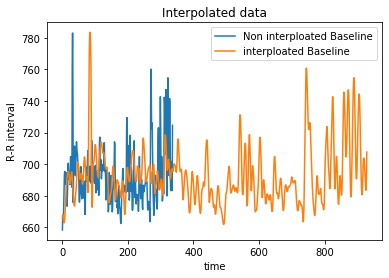

In [29]:
plt.plot(data.iloc[0],label='Non interploated Baseline'); #PLOT 
plt.plot(rr_interpolated[0],label='interploated Baseline');
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Interpolated data')
plt.legend()

In [30]:
def frequency_domain(rri, fs=4):
    # Estimate the spectral density using Welch's method
    fxx, pxx = signal.welch(x=rri, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf

    # find which frequency has the most power in each band
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

    # fraction of lf and hf
    lf_nu = 100 * lf / (lf + hf)
    hf_nu = 100 * hf / (lf + hf)
    result=[vlf,lf,hf,total_power,lf/hf,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu]
    return np.array(result),fxx, pxx
#     results = {}
#     results['Power VLF (ms2)'] = vlf
#     results['Power LF (ms2)'] = lf
#     results['Power HF (ms2)'] = hf   
#     results['Power Total (ms2)'] = total_power

#     results['LF/HF'] = (lf/hf)
#     results['Peak VLF (Hz)'] = peak_vlf
#     results['Peak LF (Hz)'] = peak_lf
#     results['Peak HF (Hz)'] = peak_hf

#     results['Fraction LF (nu)'] = lf_nu
#     results['Fraction HF (nu)'] = hf_nu
#     return results, fxx, pxx


In [31]:
x=rr_interpolated[0]

In [32]:
freq_feat=[]
for i in range(len(data)):
    results, fxx, pxx = frequency_domain(rr_interpolated[i])
    freq_feat.append(results)


In [33]:
np.array(freq_feat).shape

(54, 10)

In [34]:
freq_col=['vlf','lf','hf','tot_pow','lf_hf_ratio','peak_vlf','peak_lf','peak_hf','lf_nu','hf_nu']
freq_features=pd.DataFrame(freq_feat,columns=freq_col)
freq_features.head()

,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,36.700723,100.981021,80.752792,218.434537,1.250496,0.031250,0.062500,0.250000,55.565345,44.434655
1,794.710707,3921.708694,1447.209416,6163.628816,2.709842,0.031250,0.078125,0.156250,73.044673,26.955327
2,151.001098,207.593686,205.527292,564.122077,1.010054,0.015625,0.046875,0.203125,50.250096,49.749904
3,16.892781,38.349158,50.758252,106.000191,0.755526,0.031250,0.078125,0.234375,43.037002,56.962998
4,187.974207,285.774136,672.367222,1146.115564,0.425027,0.031250,0.062500,0.343750,29.825885,70.174115


In [35]:
features=pd.concat([time_features,freq_features],axis=1)
features.head()

,mean,var,median,amax,amin,ranges,rmssd,sdsd,nni_50,pnni_50,...,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,692.616660,325.216547,689.314286,783.000000,658.471429,124.528571,12.948296,12.966107,2.0,0.593472,...,36.700723,100.981021,80.752792,218.434537,1.250496,0.031250,0.062500,0.250000,55.565345,44.434655
1,795.525731,4084.047573,791.028571,1487.942857,586.200000,901.742857,52.590324,52.668534,11.0,3.264095,...,794.710707,3921.708694,1447.209416,6163.628816,2.709842,0.031250,0.078125,0.156250,73.044673,26.955327
2,884.116702,1891.973673,881.314286,989.428571,645.314286,344.114286,22.442022,22.466721,14.0,4.154303,...,151.001098,207.593686,205.527292,564.122077,1.010054,0.015625,0.046875,0.203125,50.250096,49.749904
3,686.036456,159.012470,685.571429,737.714286,658.471429,79.242857,8.302045,8.314343,0.0,0.000000,...,16.892781,38.349158,50.758252,106.000191,0.755526,0.031250,0.078125,0.234375,43.037002,56.962998
4,716.362018,2973.381779,690.828571,941.600000,655.742857,285.857143,37.519444,37.574123,56.0,16.617211,...,187.974207,285.774136,672.367222,1146.115564,0.425027,0.031250,0.062500,0.343750,29.825885,70.174115


# Feature selection

In [36]:
from sklearn.preprocessing import StandardScaler,scale,MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [43]:
from sklearn.svm import SVC
scaling=StandardScaler()
step=[5,7,9,10]
n_features = [10,15,20,25,30]
rfe=RFE(SVC(kernel='linear'))


## RFE

In [37]:
from sklearn.svm import SVC

clf = SVC(kernel="rbf")
n_features = [10,15,20,25,30]
step=[5,7,9,10]
Cs = [ 0.1,0.5,0.01,1,2,3,5,7,10,15,30,50,70,100]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('sc',scaling),('rfe', rfe), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(rfe__step=step,rfe__n_features_to_select=n_features,
                              classifier__C=Cs,classifier__gamma=gammas),cv=27,n_jobs=-1) 

results = estimator.fit(features,labels)
print(results.best_params_)
print(results.best_score_)

{'classifier__C': 5, 'classifier__gamma': 0.3, 'rfe__n_features_to_select': 15, 'rfe__step': 10}
0.7777777777777778


In [50]:
from sklearn.neighbors import KNeighborsClassifier
step=[5,7,9,10]
rfe=RFE(SVC(kernel='linear'))
n_neighbors  = [ 3,4,5,6,7,8,9]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
clf=KNeighborsClassifier()

param_grid = {'clf__n_neighbors': n_neighbors, 'clf__weights' : weights,'clf__metric':metric,'rfe__step':step,'rfe__n_features_to_select':n_features}
pipe = Pipeline(steps=[('sc',scaling),('rfe', rfe), ('clf', clf)])
grid_search =GridSearchCV(pipe , param_grid,  cv=27,n_jobs=-1)
grid_search.fit(features,labels)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__metric': 'minkowski', 'clf__n_neighbors': 4, 'clf__weights': 'uniform', 'rfe__n_features_to_select': 20, 'rfe__step': 5}
0.7592592592592593


In [51]:
from sklearn.linear_model import LogisticRegression
step=[5,7,9,10]
rfe=RFE(SVC(kernel='linear'))

clf=LogisticRegression()
C= [0.1, 1,3,5,8, 10,12,15]
param_grid = {'clf__C': C,'rfe__step':step,'rfe__n_features_to_select':n_features}
pipe = Pipeline(steps=[('sc',scaling),('rfe', rfe), ('clf', clf)])
grid_search =GridSearchCV(pipe , param_grid,  cv=27,n_jobs=-1)
grid_search.fit(features,labels)
print(grid_search.best_params_)
print(grid_search.best_score_)


{'clf__C': 0.1, 'rfe__n_features_to_select': 10, 'rfe__step': 9}
0.7222222222222222


In [38]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
param_grid = {'rfe__step':step,'rfe__n_features_to_select':n_features, 'clf__criterion':['gini','entropy'],'clf__max_features':["auto", "sqrt", "log2"],'clf__max_depth': np.arange(2, 20),'clf__random_state':[10,20,30,40,50]}
pipe = Pipeline(steps=[('sc',scaling),('rfe', rfe), ('clf', clf)])
grid_search =GridSearchCV(pipe , param_grid,  cv=27,n_jobs=-1)
grid_search.fit(features,labels)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__max_features': 'auto', 'clf__random_state': 40, 'rfe__n_features_to_select': 15, 'rfe__step': 10}
0.7592592592592593


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
n_estimators = [50,100,150 ]
max_depth = [5, 8, 15,]
min_samples_split = [2, 5, 10, ]
min_samples_leaf = [1, 2, 5] 
max_features = ['auto', 'sqrt']
random_state=[10,20,30,40,50]
bootstrap = [True, False]
param_grid = dict(clf__n_estimators = n_estimators, clf__max_depth = max_depth,clf__max_features=max_features,  
          clf__min_samples_split = min_samples_split, clf__bootstrap=bootstrap,
         clf__min_samples_leaf = min_samples_leaf,clf__random_state=random_state,
                 rfe__step=step,rfe__n_features_to_select=n_features)
    
pipe = Pipeline(steps=[('sc',scaling),('rfe', rfe), ('clf', clf)])
grid_search =GridSearchCV(pipe , param_grid,  cv=27,n_jobs=-1)
grid_search.fit(features,labels)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Statistical tests

In [36]:
from scipy import stats
t_test=stats.ttest_ind(features.iloc[0:len(features)//2],features.iloc[len(features)//2:len(features)])[1]

In [37]:
t_test=pd.DataFrame(zip(features.columns.tolist(),t_test.tolist()),columns=['feature','p_value'])

In [38]:
t_test[t_test['p_value']<0.05]
#t_test.round(3)

,feature,p_value
0,mean,0.023704
1,var,0.012406
2,median,0.042797
3,amax,0.015070
4,amin,0.022214
5,ranges,0.013645
6,rmssd,0.003953
7,sdsd,0.003953
8,nni_50,0.018358
9,pnni_50,0.018358


# Classification

### split features to train and test

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.3,shuffle=True,stratify=labels)

### Scale the data

In [40]:
from sklearn.preprocessing import StandardScaler,scale,MaxAbsScaler
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

### Apply Classifier

In [41]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
clf=SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
clf.score(X_test,y_test)

0.6470588235294118

### Calculate predicted values

In [43]:
y_pred=clf.predict(X_test)

### print classification report

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.57      1.00      0.73         8

    accuracy                           0.65        17
   macro avg       0.79      0.67      0.61        17
weighted avg       0.80      0.65      0.61        17



In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3 6]
 [0 8]]


In [46]:
#feature=scale(features)
# clf=LogisticRegressionCV(max_iter=2000).fit(features,labels)
# clf.score(features,labels)

In [47]:
feature=scale(features)
clf=LogisticRegressionCV(max_iter=2000).fit(feature,labels)
clf.score(feature,labels)

0.7592592592592593

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(), feature,labels, cv = 10).mean()

0.65

# Classifiers

In [49]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.pipeline import Pipeline
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

In [50]:
X,y=features,labels
accuracy=[]
accuracy_std=[]
pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', clf)])

for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=27)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())


KNeighborsClassifier
****Results****
Accuracy: 68.5185%
SVC
****Results****
Accuracy: 70.3704%
DecisionTreeClassifier
****Results****
Accuracy: 51.8519%
RandomForestClassifier
****Results****
Accuracy: 61.1111%
AdaBoostClassifier
****Results****
Accuracy: 57.4074%
GradientBoostingClassifier
****Results****
Accuracy: 61.1111%
GaussianNB
****Results****
Accuracy: 64.8148%
LinearDiscriminantAnalysis
****Results****
Accuracy: 50.0000%
QuadraticDiscriminantAnalysis
****Results****


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear


Accuracy: 59.2593%
LogisticRegression
****Results****
Accuracy: 53.7037%


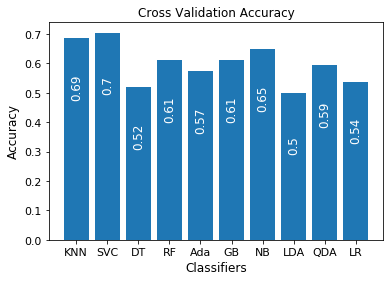

In [51]:
import matplotlib.pyplot as plt
classifier=['KNN','SVC','DT','RF','Ada','GB','NB','LDA','QDA','LR']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
ys=np.array(accuracy)
for index, value in enumerate(ys):
    plt.text(index-0.2,value-0.2, str(np.round(value,2)),rotation=90,color='white',fontsize=12)
plt.xticks(y_pos, classifier,fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Classifiers',fontsize=12)
plt.title('Cross Validation Accuracy',fontsize=12)
plt.savefig('accuracy.svg',dip=300)